In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
import joblib
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.decomposition import PCA
from decimal import Decimal

In [2]:
shap.initjs()

In [3]:
X = np.load('data/input_complete.npy')
y = np.load('data/output_complete.npy')

In [4]:
feature_names = ['$\mathregular{T_r}$', '$\mathregular{T_w}$', '$\mathregular{T_e}$', '$\mathregular{E_{bat}}$']
T = [f'$\mathregular{{d_{{T{i}}}}}$' for i in range(0,25)]
SR = [f'$\mathregular{{d_{{SR{i}}}}}$' for i in range(0,25)]
feature_names = feature_names + T + SR

In [5]:
shap_values = joblib.load('results/shap_values.z')

Text(0.5, 0, 'SHAP value (impact on model output)')

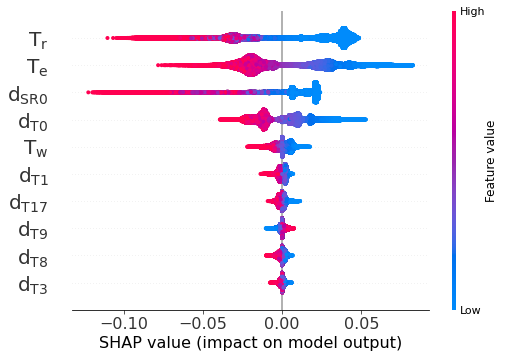

In [6]:
shap.summary_plot(shap_values[0], X, feature_names=feature_names, max_display=10, show=False)
fig, ax = plt.gcf(), plt.gca()
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=20)
ax.tick_params(axis='x', labelsize=16)
ax.set_xlabel(ax.get_xlabel(), fontsize=16)

Text(0.5, 0, 'SHAP value (impact on model output)')

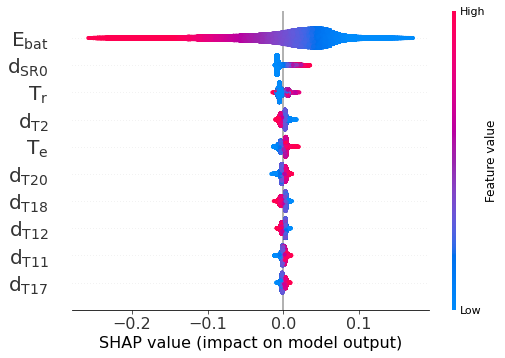

In [7]:
shap.summary_plot(shap_values[1], X, feature_names=feature_names, max_display=10, show=False)
fig, ax = plt.gcf(), plt.gca()
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=20)
ax.tick_params(axis='x', labelsize=16)
ax.set_xlabel(ax.get_xlabel(), fontsize=16)

In [8]:
res_mpc_energy = np.load('results/results_mpc.npy')

In [9]:
res_nn = pd.DataFrame(np.load('results/results_nn.npy').T, columns=['avg_violation', 'max_violation', 'grid_energy'])

In [10]:
res_nn_mini = pd.DataFrame(np.load('results/results_nn_xai.npy').T, columns=['avg_violation', 'max_violation', 'grid_energy'])

In [11]:
res_nn_pca = pd.DataFrame(np.load('results/results_nn_pca.npy').T, columns=['avg_violation', 'max_violation', 'grid_energy'])

In [12]:
res_nn['delta_energy'] = res_nn['grid_energy']-res_mpc_energy
res_nn['delta_energy_percent'] = res_nn['delta_energy'] / res_mpc_energy * 100

In [13]:
res_nn_mini['delta_energy'] = res_nn_mini['grid_energy']-res_mpc_energy
res_nn_mini['delta_energy_percent'] = res_nn_mini['delta_energy'] / res_mpc_energy * 100

In [14]:
res_nn_pca['delta_energy'] = res_nn_pca['grid_energy']-res_mpc_energy
res_nn_pca['delta_energy_percent'] = res_nn_pca['delta_energy'] / res_mpc_energy * 100

In [15]:
res_nn

,avg_violation,max_violation,grid_energy,delta_energy,delta_energy_percent
0,0.003975,0.033412,-46.265479,0.013976,-0.030199
1,0.000964,0.011139,-49.263188,0.013653,-0.027706
2,0.007486,0.095500,-36.265517,-0.041168,0.113648
3,0.006732,0.109366,-4.604958,-0.123066,2.745839
4,0.009500,0.172088,5.575319,-0.152373,-2.660289
5,0.006124,0.154979,9.989419,-0.148082,-1.460737
6,0.003864,0.075107,9.059821,-0.177577,-1.922373
7,0.004027,0.050893,4.177163,-0.152852,-3.530061
8,0.004473,0.066067,-11.785056,-0.008662,0.073553
9,0.004129,0.050635,-31.892320,-0.053290,0.167373


In [16]:
res_mpc_energy.sum()

-248.58454998135886

In [17]:
res_nn.sum()

avg_violation             0.054155
max_violation             0.849132
grid_energy            -249.386112
delta_energy             -0.801562
delta_energy_percent     -6.582522
dtype: float64

In [18]:
res_nn.mean()

avg_violation            0.004513
max_violation            0.070761
grid_energy            -20.782176
delta_energy            -0.066797
delta_energy_percent    -0.548543
dtype: float64

In [19]:
res_nn_mini

,avg_violation,max_violation,grid_energy,delta_energy,delta_energy_percent
0,0.000741,0.028374,-46.229619,0.049835,-0.107684
1,0.000817,0.028209,-49.170346,0.106495,-0.216115
2,0.001916,0.029082,-36.355690,-0.131341,0.362577
3,0.002885,0.030397,-4.336138,0.145754,-3.252072
4,0.002536,0.065412,5.685203,-0.042489,-0.741816
5,0.002048,0.066643,9.979711,-0.157791,-1.556503
6,0.002065,0.056176,9.234334,-0.003064,-0.033175
7,0.004035,0.096369,4.352027,0.022012,0.508357
8,0.002548,0.063880,-11.418932,0.357462,-3.035408
9,0.005747,0.048706,-31.620976,0.218053,-0.684862


In [20]:
res_nn_mini.sum()

avg_violation             0.029206
max_violation             0.590839
grid_energy            -247.729807
delta_energy              0.854743
delta_energy_percent     -9.311132
dtype: float64

In [21]:
res_nn_mini.mean()

avg_violation            0.002434
max_violation            0.049237
grid_energy            -20.644151
delta_energy             0.071229
delta_energy_percent    -0.775928
dtype: float64

In [22]:
res_nn_pca

,avg_violation,max_violation,grid_energy,delta_energy,delta_energy_percent
0,0.772781,7.205077,-46.238477,0.040978,-0.088544
1,20.697982,65.506834,-161.580909,-112.304068,227.904360
2,39.082217,68.784836,-238.779101,-202.554752,559.167402
3,9.914405,49.305200,-84.772574,-80.290681,1791.445950
4,0.388716,2.715359,-1.799589,-7.527281,-131.419086
5,0.732008,4.324444,2.682313,-7.455189,-73.540691
6,0.133279,1.244727,4.813259,-4.424140,-47.893785
7,0.340958,2.168000,3.105314,-1.224701,-28.283993
8,8.987857,51.355725,-85.111614,-73.335221,622.730718
9,52.345094,66.593123,-304.721749,-272.882719,857.069838


In [23]:
res_nn_pca.sum()

avg_violation            238.932905
max_violation            461.968612
grid_energy            -1504.699975
delta_energy           -1256.115425
delta_energy_percent    4809.584887
dtype: float64

In [24]:
res_nn_pca.mean()

avg_violation            19.911075
max_violation            38.497384
grid_energy            -125.391665
delta_energy           -104.676285
delta_energy_percent    400.798741
dtype: float64

In [25]:
res_nn_pca.max()

avg_violation             54.881170
max_violation             73.102662
grid_energy                4.813259
delta_energy               0.040978
delta_energy_percent    1791.445950
dtype: float64

In [26]:
res_nn['delta_energy'].sum()

-0.8015616052648529

In [27]:
res_nn_mini['delta_energy'].sum()

0.8547426349618954

In [28]:
shap_0_mpc = np.load('results/shap_values_0_mpc_30.npy')
shap_0_nn = np.load('results/shap_values_0_nn_30.npy')

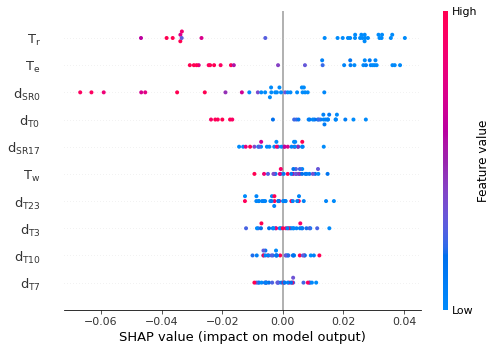

In [29]:
shap.summary_plot(shap_0_mpc, X[:30], feature_names=feature_names, max_display=10)

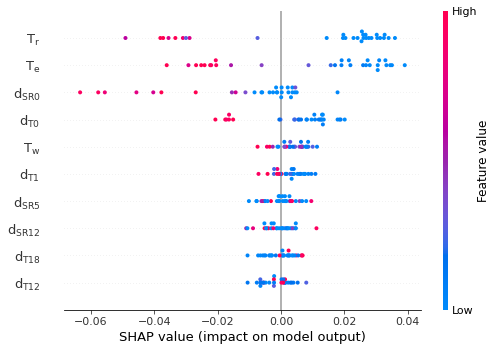

In [30]:
shap.summary_plot(shap_0_nn, X[:30], feature_names=feature_names, max_display=10)

In [31]:
shap_1_mpc = np.load('results/shap_values_1_mpc_30.npy')
shap_1_nn = np.load('results/shap_values_1_nn_30.npy')

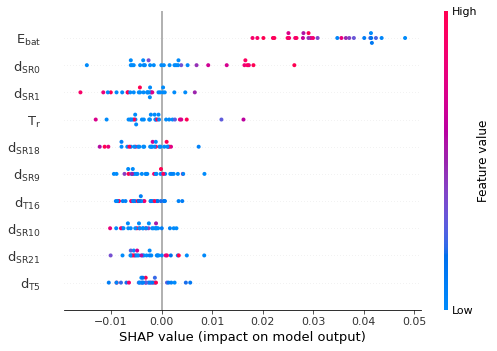

In [32]:
shap.summary_plot(shap_1_mpc, X[:30], feature_names=feature_names, max_display=10)

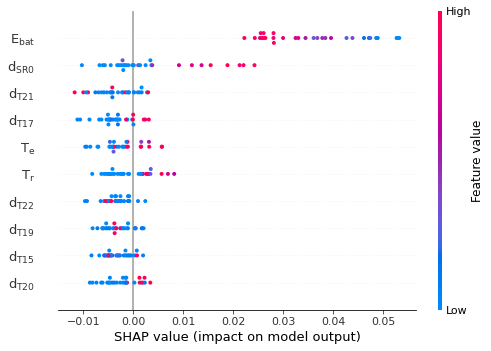

In [33]:
shap.summary_plot(shap_1_nn, X[:30], feature_names=feature_names, max_display=10)

# State trajectories

In [34]:
state_apr = np.load('results/state_trajectories/nn/start_index_2711.npy')
state_apr_mpc = np.load('results/state_trajectories/mpc/start_index_2711.npy')
state_apr_mini = np.load('results/state_trajectories/nn_xai/start_index_2711.npy')
state_apr_pca = np.load('results/state_trajectories/nn_pca/start_index_2711.npy')

In [35]:
state_aug = np.load('results/state_trajectories/nn/start_index_5663.npy')
state_aug_mpc = np.load('results/state_trajectories/mpc/start_index_5663.npy')
state_aug_mini = np.load('results/state_trajectories/nn_xai/start_index_5663.npy')

Text(0.5, 0, 'Timestep [h]')

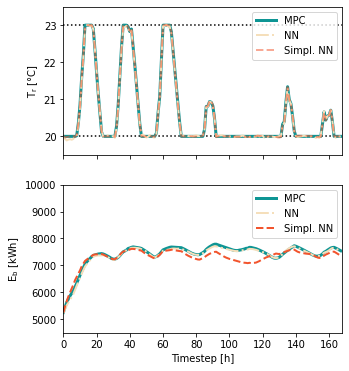

In [36]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(5,6))
ax1.plot(state_apr_mpc[0], label='MPC', color='#0E9594', linewidth=3)
ax1.plot(state_apr[0], label='NN', ls='-.', alpha=1, linewidth=2, color='#F5DFBB')
ax1.plot(state_apr_mini[0], label='Simpl. NN', color='#F2542D',alpha=0.5, linewidth=2, ls='--')
ax1.set_ylim(19.5, 23.5)
ax1.set_xlim(0, 168)
ax1.set_ylabel('$\mathregular{T_r}$ [°C]')
ax1.hlines(20, 0, 168, ls=':', color='black')
ax1.hlines(23, 0, 168, ls=':', color='black')
ax1.legend()
ax2.plot(state_apr_mpc[-1], label='MPC', color='#0E9594', linewidth=3)
ax2.plot(state_apr[-1], label='NN', ls='-.', alpha=1, linewidth=2, color='#F5DFBB')
ax2.plot(state_apr_mini[-1], label='Simpl. NN', color='#F2542D',alpha=1, linewidth=2, ls='--')
ax2.set_ylim(4500, 10000)
ax2.set_ylabel('$\mathregular{E_b}$ [kWh]')
ax2.legend()
plt.xlabel('Timestep [h]')

Text(0.5, 0, 'Timestep [h]')

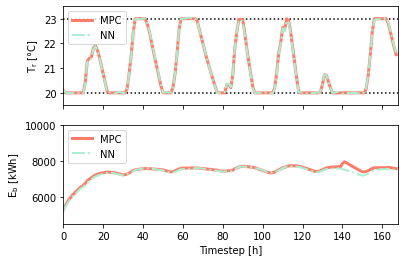

In [37]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
ax1.plot(state_aug_mpc[0], label='MPC', color='#FF7E6B', linewidth=3)
ax1.plot(state_aug[0], label='NN', ls='-.', alpha=1, linewidth=2, color='#A9F0D1')
ax1.set_ylim(19.5, 23.5)
ax1.set_xlim(0, 168)
ax1.set_ylabel('$\mathregular{T_r}$ [°C]')
ax1.hlines(20, 0, 168, ls=':', color='black')
ax1.hlines(23, 0, 168, ls=':', color='black')
ax1.legend()
ax2.plot(state_aug_mpc[-1], label='MPC', color='#FF7E6B', linewidth=3)
ax2.plot(state_aug[-1], label='NN', ls='-.', alpha=1, linewidth=2, color='#A9F0D1')
ax2.set_ylim(4500, 10000)
ax2.set_ylabel('$\mathregular{E_b}$ [kWh]')
ax2.legend()
plt.xlabel('Timestep [h]')

Text(0.5, 0, 'Timestep [h]')

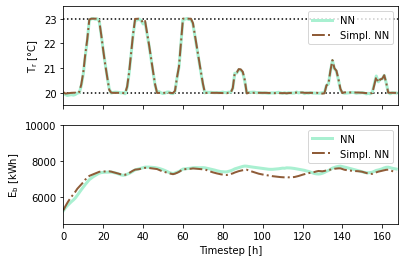

In [38]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
ax1.plot(state_apr[0], label='NN', linewidth=3 , color='#A9F0D1')
ax1.plot(state_apr_mini[0], label='Simpl. NN', color='#8F5C38',alpha=1, linewidth=2, ls='-.')
ax1.set_ylim(19.5, 23.5)
ax1.set_xlim(0, 168)
ax1.set_ylabel('$\mathregular{T_r}$ [°C]')
ax1.hlines(20, 0, 168, ls=':', color='black')
ax1.hlines(23, 0, 168, ls=':', color='black')
ax1.legend()
ax2.plot(state_apr[-1], label='NN', linewidth=3 , color='#A9F0D1')
ax2.plot(state_apr_mini[-1], label='Simpl. NN', color='#8F5C38',alpha=1, linewidth=2, ls='-.')
ax2.set_ylim(4500, 10000)
ax2.set_ylabel('$\mathregular{E_b}$ [kWh]')
ax2.legend()
plt.xlabel('Timestep [h]')

Text(0.5, 0, 'Timestep [h]')

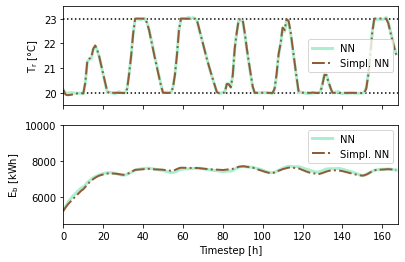

In [39]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
ax1.plot(state_aug[0], label='NN', linewidth=3 , color='#A9F0D1')
ax1.plot(state_aug_mini[0], label='Simpl. NN', color='#8F5C38',alpha=1, linewidth=2, ls='-.')
ax1.set_ylim(19.5, 23.5)
ax1.set_xlim(0, 168)
ax1.set_ylabel('$\mathregular{T_r}$ [°C]')
ax1.hlines(20, 0, 168, ls=':', color='black')
ax1.hlines(23, 0, 168, ls=':', color='black')
ax1.legend()
ax2.plot(state_aug[-1], label='NN', linewidth=3 , color='#A9F0D1')
ax2.plot(state_aug_mini[-1], label='Simpl. NN', color='#8F5C38',alpha=1, linewidth=2, ls='-.')
ax2.set_ylim(4500, 10000)
ax2.set_ylabel('$\mathregular{E_b}$ [kWh]')
ax2.legend()
plt.xlabel('Timestep [h]')

Text(0.5, 0, 'Timestep [h]')

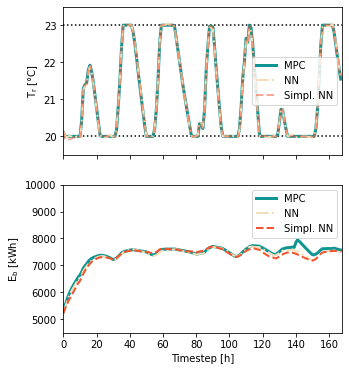

In [40]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(5,6))
ax1.plot(state_aug_mpc[0], label='MPC', color='#0E9594', linewidth=3)
ax1.plot(state_aug[0], label='NN', ls='-.', alpha=1, linewidth=2, color='#F5DFBB')
ax1.plot(state_aug_mini[0], label='Simpl. NN', color='#F2542D',alpha=0.5, linewidth=2, ls='--')
ax1.set_ylim(19.5, 23.5)
ax1.set_xlim(0, 168)
ax1.set_ylabel('$\mathregular{T_r}$ [°C]')
ax1.hlines(20, 0, 168, ls=':', color='black')
ax1.hlines(23, 0, 168, ls=':', color='black')
ax1.legend()
ax2.plot(state_aug_mpc[-1], label='MPC', color='#0E9594', linewidth=3)
ax2.plot(state_aug[-1], label='NN', ls='-.', alpha=1, linewidth=2, color='#F5DFBB')
ax2.plot(state_aug_mini[-1], label='Simpl. NN', color='#F2542D',alpha=1, linewidth=2, ls='--')
ax2.set_ylim(4500, 10000)
ax2.set_ylabel('$\mathregular{E_b}$ [kWh]')
ax2.legend()
plt.xlabel('Timestep [h]')

Text(0.5, 0, 'Timestep [h]')

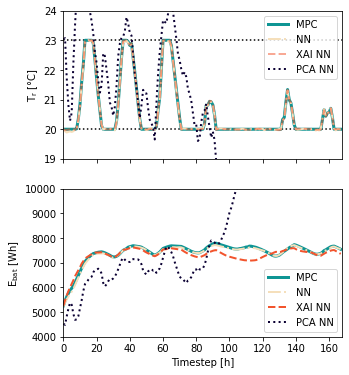

In [41]:
# Plot with PCA

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(5,6))
ax1.plot(state_apr_mpc[0], label='MPC', color='#0E9594', linewidth=3)
ax1.plot(state_apr[0], label='NN', ls='-.', alpha=1, linewidth=2, color='#F5DFBB')
ax1.plot(state_apr_mini[0], label='XAI NN', color='#F2542D',alpha=0.5, linewidth=2, ls='--')
ax1.plot(state_apr_pca[0], label='PCA NN', color='#0B0033', linewidth=2, ls=':')
ax1.set_ylim(19, 24)
ax1.set_xlim(0, 168)
ax1.set_ylabel('$\mathregular{T_r}$ [°C]')
ax1.hlines(20, 0, 168, ls=':', color='black')
ax1.hlines(23, 0, 168, ls=':', color='black')
ax1.legend()
ax2.plot(state_apr_mpc[-1], label='MPC', color='#0E9594', linewidth=3)
ax2.plot(state_apr[-1], label='NN', ls='-.', alpha=1, linewidth=2, color='#F5DFBB')
ax2.plot(state_apr_mini[-1], label='XAI NN', color='#F2542D',alpha=1, linewidth=2, ls='--')
ax2.plot(state_apr_pca[-1], label='PCA NN', color='#0B0033', linewidth=2, ls=':')
ax2.set_ylim(4000, 10000)
ax2.set_ylabel('$\mathregular{E_{bat}}$ [Wh]')
ax2.legend()
plt.xlabel('Timestep [h]')

# SHAP comparison plots

Text(0.5, 0, 'SHAP value (impact on model output)')

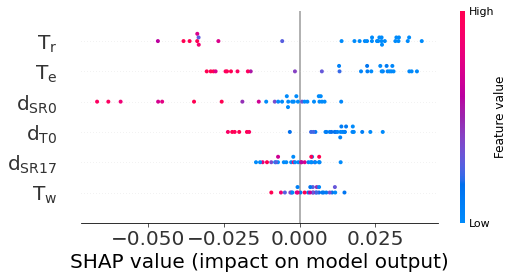

In [42]:
shap.summary_plot(shap_0_mpc, X[:30], feature_names=feature_names, max_display=6, show=False)
fig, ax = plt.gcf(), plt.gca()
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)

Text(0.5, 0, 'SHAP value (impact on model output)')

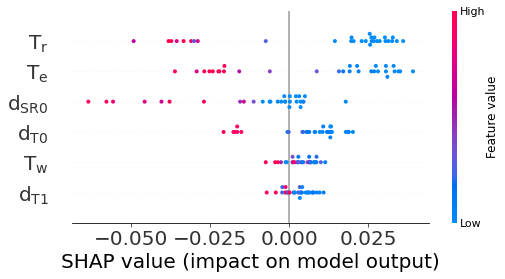

In [43]:
shap.summary_plot(shap_0_nn, X[:30], feature_names=feature_names, max_display=6, show=False)
fig, ax = plt.gcf(), plt.gca()
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)

Text(0.5, 0, 'SHAP value (impact on model output)')

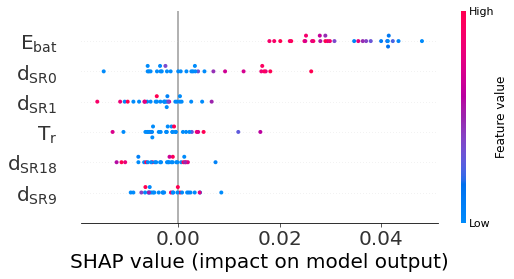

In [44]:
shap.summary_plot(shap_1_mpc, X[:30], feature_names=feature_names, max_display=6, show=False)
fig, ax = plt.gcf(), plt.gca()
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)

Text(0.5, 0, 'SHAP value (impact on model output)')

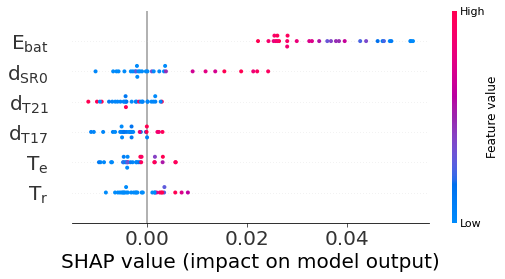

In [45]:
shap.summary_plot(shap_1_nn, X[:30], feature_names=feature_names, max_display=6, show=False)
fig, ax = plt.gcf(), plt.gca()
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)